In this project, we will be investigating a set of data from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia to find answers about employment satisfaction at these respective organizations.

The dataset is no longer available from the source, and the contents have not been clarified via a subject matter expert from either of the institutes, so some liberties will be taken as far as interpreting what this data is describing.

A couple of questions we are out to answer in our analysis are:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
- What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Let's begin by importing needed Python libraries, the data itself, and taking some first looks at characteristics of the data.


In [586]:
# Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#The data
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

#First look at data
print("dete_survey Summary:")
print("")
print(dete_survey.info())
print("")
print(dete_survey.head())

print("")

print("tafe_survey Summary:")
print("")
print(tafe_survey.info())
print("")
print(tafe_survey.head())

dete_survey Summary:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private 

We can observe a few things from our first look at the data:
- The DETE data set is 822 rows and 56 columns.
- The TAFE data set is 702 rows and 72 columns.
- There is a significant amount of missing values in both data sets, with a few noticable patterns. But these may not be important for our analysis.
    - Columns 5-16 in the TAFE survey all have 437 non-null values, it's likely they are missing the same portions.
    - The last 5 columns of the DETE survey are almost entirely missing, with at least 775 missing values in each of these columns.
- Also the DETE survey has "Not Stated" entries in the data set, which are essentially NaN values.
- The long form written answers in the TAFE data set are an issue for categorizing this data cleanly, and may need to be dealt with or dropped.
- The column names of the TAFE data are unworkably long as well as being similar in content to the column names of the DETE dataset.
- We aren't concerned with anything but the cause of dissatisfaction of shorter and longer term employees as well as younger and older employees in our analysis, so we can drop or ignore any missing parts of the data that doesn't affect these groups.
- Dates are not in datetime format, which may prove difficult in determing the length of tenure of an employee.
- There are multiple columns that describe an employee's disatisfaction.

From what we observe, an initial action plan can be determined:
- We will match the column names of the TAFE data to the DETE data where this applies, and shorten the rest.
- Categorize exits based on "satisfied" or "dissatisfied" by evaluating the multiple columns and filter only for dissatisfaction when necessary. We can add a new column for this.
- We will need to transform the "Not Stated" values of the TAFE data set to NaN values, so then our processes for dealing with the NaN values can apply.
- Since we can trust we didn't lose values from any data cleaning transformations, we will either need to fill or drop rows for our missing values.
- We will need to shorten the column names of the TAFE data set.
- We will need to find some way of working with the written answers, perhaps creating categories of keywords that appear in each response, and filling the columns with the keyword instead of the longform response.'
- We will convert employee start and departure dates to datetime objects to more easily work with them.


Next, we will begin the process of considering these "Not Stated" values as NaN values, and dropping values that are not needed for our analysis. The reason for the first part is we want to make NaN values uniform, as the nuance of "Not Needed" is redundant. The reason for the second part is to answer the questions we are out to answer, we will only need information about employees - Age, Tenure, and Satisfaction upon exit of the job.

In [587]:
#The easiest way to change "Not Stated" to NaN is to re-import
dete_survey = pd.read_csv("dete_survey.csv",na_values="Not Stated")

#Checking the result
print(dete_survey.head(2))



#Removing columns that are irrelevant to our analysis

dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

#Checking the result

print(dete_survey_updated.info())
print("")
print(tafe_survey_updated.info())

   ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   

   Role Start Date        Position Classification          Region  \
0           2004.0  Public Servant        A01-A04  Central Office   
1              NaN  Public Servant        AO5-AO7  Central Office   

                       Business Unit    Employment Status  ...  Kept informed  \
0  Corporate Strategy and Peformance  Permanent Full-time  ...              N   
1  Corporate Strategy and Peformance  Permanent Full-time  ...              N   

   Wellness programs  Health & Safety  Gender    Age  Aboriginal  \
0                  N                N    Male  56-60         NaN   
1                  N                N    Male  56-60         NaN   

   Torres Strait  South Sea  Disability  NESB  
0            NaN        NaN         NaN   Yes  
1            NaN        NaN      

We can see that the "DETE Start Date" for row 1 became NaN when it was "Not Stated" before, so the conversion was a success.

Also, we can see the large reduction of number of columns showing our dropping method worked as well.

Now, we will look at the column names and making them uniform, as there are corresponding columns in each dataset that are representing the same value but have different column names.

In [588]:
#Renaming columns for DETE data
print("Before:")
print("")
print(dete_survey_updated.columns)
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(" ","_").str.replace('\s+', ' ').str.lower()
print("")
print("After:")
print("")
print(dete_survey_updated.columns)

Before:

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

After:

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_pri

C:\Users\Dan\AppData\Local\Temp/ipykernel_10408/4288302408.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  dete_survey_updated.columns = dete_survey_updated.columns.str.replace(" ","_").str.replace('\s+', ' ').str.lower()


In [589]:
#Renaming columns for TAFE data
renames = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}


print("Before:")
print("")
print(tafe_survey_updated.columns)
print("")
tafe_survey_updated.rename(renames,axis=1,inplace=True)
print("After:")
print("")
print(tafe_survey_updated.columns)

Before:

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      

Above we can see our changes. The column titles were non-uniform between the two dataframes, and needlessly long in the TAFE dataframe. Now we should be able to combine the two dataframes with some success after these column renames.

Continuing onward, we have noted the amounts of data we do not require to do our analysis, and in this step, we will focus on selecting the rows that were from employees who resigned, which would mean there is "Resignation" somewhere in the seperationtype column for that row. Let's search for these entries and isolate them.

In [590]:
#Looking at the resignation entries
print("DETE Seperation Types:")
print("")
print(dete_survey_updated["separationtype"].value_counts())
print("")
print("TAFE Seperation Types:")
print("")
print(tafe_survey_updated["separationtype"].value_counts())

#Selecting for rows that are resignations
dete_resignations = dete_survey_updated.loc[dete_survey_updated["separationtype"].str.contains("Resignation"),:].copy()
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated["separationtype"].str.contains("Resignation",na=False),:].copy()

#Checking the result
print("")
print(dete_resignations["separationtype"].head(20))
print("")
print(tafe_resignations["separationtype"].head(20))

DETE Seperation Types:

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

TAFE Seperation Types:

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

3                Resignation-Other reasons
5                Resignation-Other reasons
8                Resignation-Other reasons
9               Resignation-Other employer
11    Resignation-Move overseas/interstate
12               Resignation-Other reasons
14              Resignation-Other 

Now that we have isolated the rows for resignations, we want to look at the years for when these employees worked, and make sure they actually make sense, and remove values that don't make sense. An Example would be an employee having a start date later in time than their end date.

In [591]:
#First look at the the DETE date data. (Heh.)

print(dete_resignations["cease_date"].value_counts())

#Extracting the year from resignations into a temporary dataframe

pattern = r"([1-2][0-9][0-9][0-9])"
dete_res_years_temp = dete_resignations.copy()
dete_res_years_temp["dete_res_years"] = dete_resignations["cease_date"].str.extract(pattern).astype(float)

#Checking to see it worked
print("")
print(dete_res_years_temp["dete_res_years"].value_counts())

#Checking if there are any entries where the resignation date was before the start date
print("")
dete_years_mask = dete_res_years_temp.loc[dete_res_years_temp["dete_start_date"] > dete_res_years_temp["dete_res_years"],:]
print(dete_years_mask)

#Since this above was an empty dataframe, that means it all looks valid

#Checking TAFE entries
print("")
print(tafe_resignations["cease_date"].value_counts())

#These look fine as well, as there was no start date to compare them against, our analysis is limited

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: dete_res_years, dtype: int64

Empty DataFrame
Columns: [id, separationtype, cease_date, dete_start_date, role_start_date, position, classification, region, business_unit, employment_status, career_move_to_public_sector, career_move_to_private_sector, interpersonal_conflicts, job_dissatisfaction, dissatisfaction_with_the_department, physical_work_environment, lack_of_recognition, lack_of_job_security, work_location, employment_conditions, maternity/family, relocation, study/travel, ill_health, traumatic_incident, work_life_balance, workload, none_of_the_above, gender, age, aboriginal, torres_strait, south_sea, disability, nesb, dete_res_years]
I

From the above work, we see that there aren't any years that look incorrect such that they need removal, and the year overlap from the DETE and TAFE dataset are not exactly the same timeframe in terms of their population, as there are no entries for the 2014 year in the TAFE dataset.

Next, we are going to make a column called "institute_service" in the DETE dataset to match the one of the same name in the TAFE dataset. We can use this to determine long vs. short term employees in both datasets.

In [592]:
#Creating institute_service column to match DETE data to TAFE data
dete_resignations["institute_service"] = dete_res_years_temp["dete_res_years"] - dete_resignations["dete_start_date"]

#Checking the result
print(dete_resignations["institute_service"])

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64


Next, we will be cleaning our data so that the rows of the TAFE data that represent dissatisfied employees can be used more easily, by changing what is entered to simple True, False or NaN entries so that it matches the corresponding columns from the DETE dataset. After this we will be able to select for all employees who were dissatisfied for any reason with ease.

We will make a function called "update_vals" to use in conjunction with the applymap() function to change these values based on what is entered. From a glance, we will assume "-" means False, and "Contributing Factors. Dissatisfaction" means True as entries in the columns in question.

In [593]:
#Finding the entered values and seeing a "before" snapshot of a sample column
print("TAFE Before:")
print("")
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print("")
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())
print("")

#Defining the update_vals function to be applied on both dataframes and their respective columns.
def update_vals(value):
    if pd.isnull(value) == True:
        return np.nan
    elif value == "-":
        return False
    else:
        return True

#The columns in question
dete_cols = ['job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload'
]    
tafe_cols = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']

#Transforming the values for TAFE only, because the DETE values are already booleans
tafe_resignations[tafe_cols] = tafe_resignations[tafe_cols].applymap(update_vals)

#Checking the result
print("TAFE After:")
print("")
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print("")
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())
print("")

TAFE Before:

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

TAFE After:

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64



Now that we have matched the values, we can now check all rows for ones that have any type of dissatisfaction as the reason for the employee's departure, we will capture the result in a new column called "dissatisfied" in each dataframe. Let's do that below.

In [594]:
#Creating the dissatisfied column
tafe_resignations["dissatisfied"] = tafe_resignations[tafe_cols].any(axis=1, skipna=False)
dete_resignations["dissatisfied"] = dete_resignations[dete_cols].any(axis=1, skipna=False)

#Checking our work
print(tafe_resignations["dissatisfied"].value_counts())
print(dete_resignations["dissatisfied"].value_counts())

#Making copies as new dataframes to avoid SettingwithCopy warnings
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

False    241
True      99
Name: dissatisfied, dtype: int64
False    162
True     149
Name: dissatisfied, dtype: int64


Now that this has been cleaned, we can finally combine these two dataframes to work with all resignations from both institutes in a single dataframe.

We will make an "institute" column to identify the row's origin, and then combine the two dataframes while dropping null values at the same time. We have seen that a majority of the NaN data is contained in columns that are not relevant to our analysis, so we can freely drop them.

In [595]:
#Giving each dataframe a label to identify which it came from
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

#Checking that it worked
print(dete_resignations_up["institute"].value_counts())
print(tafe_resignations_up["institute"].value_counts())
print("")

#Combining the two dataframes and dropping NaN values
combined_updated = pd.concat([dete_resignations_up,tafe_resignations_up]).dropna(axis=1,thresh=500)

#Checking if it worked
print(dete_resignations_up.info())
print("")
print(tafe_resignations_up.info())
print("")
print(combined_updated.info())

DETE    311
Name: institute, dtype: int64
TAFE    340
Name: institute, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_t

Seeing 311 entries from the DETE dataset and 340 entries from the TAFE dataset, the 651 entries in the combined data frame make sense as a combination of the two.

Now, we are close to beginning our analysis after this extensive cleaning. But one thing we notice is...

In [596]:
combined_updated["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


...the "institute_service" column needs some attention, as we want to be able to engage with the data based on the career service of the employees. We can see that we have a mix of exact years of service, and also ranges of years of service as wide as 11-20. We want to make this data uniform in some way.

BusinessWire has an article (https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) on grouping employees into career stages as follows...

    New: Less than 3 years at a company - 0-2 years
    Experienced: 3-6 years at a company - 3-6 years
    Established: 7-10 years at a company - 7-10 years
    Veteran: 11 or more years at a company - 11+ years

We will follow this grouping strategy, as the exact years of service are not as important to our analysis as the stage of career the employee is in. First, we must begin by cleaning our data so that we are working with numerical float values so that we can use a function to make the categories above.

In [597]:
#The values will need to be strings to be able to be shaped
combined_updated["institute_service"] = combined_updated["institute_service"].astype(str)

#RegEx for finding the first 1 or more digits before a non-digit character
pattern = r"(\d+)"
ins_serv_temp = combined_updated["institute_service"].str.extract(pattern)

#Checking our work
print(combined_updated["institute_service"].value_counts(ascending=False))
print("")
print(ins_serv_temp.value_counts())
print("")
      
#lollers should be 88 less than what is in the institute_service column, there are 88 NaN values
print(combined_updated["institute_service"].value_counts().sum())
print("")
print(ins_serv_temp.value_counts().sum())

#Writing the temp values back to the column after checking, making them floats, and checking our work
combined_updated["institute_service"] = ins_serv_temp.astype(float)
print("")
print(combined_updated["institute_service"].value_counts())

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2


Now, we will transform the current contents of the column into these groupings below. We will do this by making a function to sort the values into categories, and then apply it using apply().

In [598]:
#function to use with apply()
def careerstage(years):
    if pd.isnull(years):
        return np.nan
    elif years < 3:
        return "New"
    elif 3 <= years <= 6:
        return "Experienced"
    elif 7 <= years <= 10:
        return "Established"
    elif years >= 11:
        return "Veteran"
    
#Categorizing the values and populating a new column with them
combined_updated["service_cat"] = combined_updated["institute_service"].apply(careerstage)

#Checking our work
print(combined_updated["service_cat"].value_counts())

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64


Now, that we have cleaned our data for resignations, age, and years of service, we can begin our analysis. We are going to take make a pivot table of the "service_cat" column we made of service category, and aggregate it against the "dissastisfied" entries. 

A pivot table by default is going to equate "True" values as 1, and "False" values as 0, so if we aggregate by the mean, which is the default method in the pd.pivot_table() function, we will be returned a percentage breakdown for each category. We can then plot this pivot table as a bar plot and see our results.

False    403
True     248
Name: dissatisfied, dtype: int64


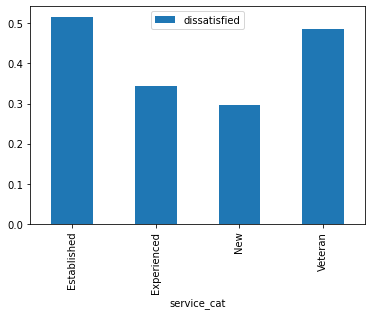

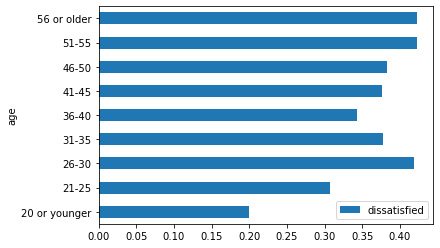

In [602]:
#Checking True/False counts of "dissatisfied" column
print(combined_updated["dissatisfied"].value_counts(dropna=False))

#Plotting our results for service cat
%matplotlib inline
combined_updated.pivot_table(values="dissatisfied",index="service_cat").plot(kind="bar")
plt.show()

#Doing a cleaning of the age column for a clearer graph, and then plotting the results
combined_updated["age"] = combined_updated["age"].str.replace("  ","-")
combined_updated["age"] = combined_updated["age"].str.replace("56-60","56 or older").str.replace("61 or older","56 or older")
combined_updated.pivot_table(values="dissatisfied",index="age").plot(kind="barh")
plt.show()

Now, back to the original questions...


Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?
- Answer: Yes, about 30% of new employees are resigning due to dissatisfaction.

What about employees who have been there longer?
- Answer: The longer an employee has been with an institute, the more likely it is that they depart due to some sort of dissatisfaction.

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
- Answer: We see under 20 employees have a less than 20% dissatisfaction rate, going up to as much as 30% for employees under 25. Every group older than the 25 or younger group sees a large increase in dissatisfaction rate upon their termination of 10% or more. This is suggesting that although there is some concern to investigate among younger employees' dissatisfaction, the dissatisfaction is much more prevalant among older employees.

As we can see, a lot of data cleaning can be required before we can even answer simple questions about the dataset. This is what we may encounter in real world data projects as something to be ready for!